In [1]:
#import libraries
from marketstackAPI import Marketstack
import pandas as pd
import numpy as np
import cufflinks as cf
import ta
import holidays
from datetime import datetime
from datetime import timedelta

In [2]:
#initialize and set parameters
MS = Marketstack()
cf.set_config_file(theme='henanigans',sharing='public',offline=True)

In [33]:
def raw_data_preprocessing(data):
    data = data[['date','adj_high','adj_low','adj_close','adj_open','adj_volume']]
    data.columns = ['date','high','low','close','open','volume']
    data = ta.add_all_ta_features(data[::-1], open="open", high="high", low="low", close="close", volume="volume",)
    data.insert(1,'change',data.close.shift(-1)/data.close-1)
    data.reset_index(inplace=True)
    return data




In [34]:
def plot(df):
    qf = cf.QuantFig(data,legend='bottom')
    qf.add_volume()
#     qf.add_rsi()
#     qf.add_adx()
    qf.iplot()

In [31]:
# get data
data = MS.get('SPY')
# preprocessing data
# remove extra columns and add basic technical indicators
data = raw_data_preprocessing(data)

/home/ubuntu/miniconda3/lib/python3.8/site-packages/ta/trend.py:768: RuntimeWarning:

invalid value encountered in double_scalars

/home/ubuntu/miniconda3/lib/python3.8/site-packages/ta/trend.py:772: RuntimeWarning:

invalid value encountered in double_scalars



In [35]:
plot(data)

In [36]:
data

,index,date,change,high,low,close,open,volume,volume_adi,volume_obv,...,momentum_wr,momentum_ao,momentum_kama,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,others_dr,others_dlr,others_cr
0,170,2020-06-02T00:00:00+0000,0.013308,308.1300,305.1000,308.08,306.550,73635043.0,7.120484e+07,7.363504e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-10.555622,NaN,0.000000
1,169,2020-06-03T00:00:00+0000,0.035300,313.2200,309.9400,312.18,310.240,91750087.0,1.047719e+08,1.653851e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.330823,1.322046,1.330823
2,168,2020-06-08T00:00:00+0000,-0.007457,323.4100,319.6300,323.20,320.220,73310274.0,1.699366e+08,2.386954e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.530015,3.469138,4.907816
3,167,2020-06-09T00:00:00+0000,-0.005580,323.2849,319.3600,320.79,320.300,77174695.0,1.489977e+08,1.615207e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.745668,-0.748462,4.125552
4,166,2020-06-10T00:00:00+0000,-0.057649,322.3900,318.2209,319.00,321.420,93944722.0,9.016477e+07,6.757599e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.557997,-0.559560,3.544534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,4,2021-02-01T00:00:00+0000,0.014140,377.3400,370.3760,376.23,373.720,75817597.0,8.502312e+08,1.022280e+09,...,-54.721274,2.830011,376.416274,-0.937360,9.493610,3.697449,5.796162,1.664550,1.650848,22.120878
167,3,2021-02-02T00:00:00+0000,0.000786,383.2200,376.3181,381.55,379.650,62923781.0,8.827046e+08,1.085204e+09,...,-24.459613,1.410440,376.475514,0.816467,6.962286,4.350416,2.611869,1.414029,1.404125,23.847702
168,2,2021-02-03T00:00:00+0000,0.011366,383.7000,380.4800,381.85,382.435,52427090.0,8.748894e+08,1.137631e+09,...,-22.753129,2.155587,376.528048,1.636944,3.745111,4.229355,-0.484244,0.078627,0.078596,23.945079
169,1,2021-02-04T00:00:00+0000,0.003936,386.2400,381.9655,386.19,382.960,47142555.0,9.209290e+08,1.184773e+09,...,-0.278242,2.713321,376.613522,1.991285,0.486842,3.480853,-2.994010,1.136572,1.130162,25.353804


In [7]:
min_year = int(min(data['date'])[:4])-2
max_year = int(max(data['date'])[:4])+2
min_date = str(min_year)+'-01-01'
max_date = str(max_year)+'-12-31'
dates = pd.date_range(min_date,max_date).values
holidays = holidays.UnitedStates(years=range(min_year,max_year))

<AxesSubplot:>

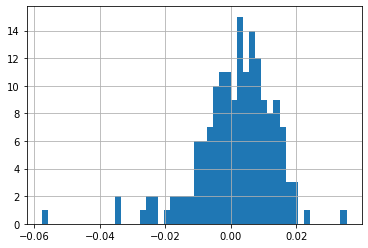

In [44]:
data.change.hist(bins=50)

In [41]:
?pd.DataFrame.hist